<a href="https://colab.research.google.com/github/citjimm/DMDS/blob/main/PS6-Cit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#PS6 - ELA Camden Districts datasets


**School Project**
we merged two data sources from lucy's PS1 (enrollment from 2020-2021, and a geographical supplmentary file). This initial merging of the first two data sets created a new and useful dataset that assigned a geographical location to charterschools in NJ. And we merged in a new column containing district means extracted from a very large 2021 annual data file https://www.nj.gov/education/assessment/results/reports/2122/index.shtml on statewide assessment for grade 9 students around NJ.

This is of interests to us as we are currently working with a Camden Charter School and hope to explore the relative standing of it among adjacent schools.

Public schools (charter schools were not assigned a district name by their own school names) could potentially serve as counterparts so we could estimate the effect of being enrolled in that particular charter school.

we'll merge in more years of data if needed in the future, but that would depend on bit on data coming from the Charter School we're working with (to determine a time range and model trends). but the current dataset, looking at one year only, could be used towards correlational tests on ELA scores and demographic composition and poverty indicator.



The Urban hope act in 2012 which lead to a state take over low performing district of Camden( In2013, renecansse schools being introduced in 2014). Drastically changing the educational landscape of the City.

Micheal Hayes did a difference in difference to look at impact of state takeover on Camden schools ELA and Math scores. He found there is an increase that can be seen but it can not be attributed to takeover, there seems to be a trend statewide even before takeover. So is there a difference between school types? CREDO found some differences when comparing ELA scores among the 3 types of schools however did not specify statistical significance.

Research question:

Was there a difference in relationship between Covid and state standardized test scores for English Language Arts across schools in Camden City for grade 9? Are these differences statistically significant

Our hypothesis is that covid had a greater negative impact on ELA scores of traditional public schools as opposed to the traditional and charter renaissance schools.

Variables we would look at are school type School types being traditional charter Schools, Renaissance charter schools, and traditional public schools, and we would look at English Language Arts scores provided by New Jerseys Department of Education.

We can include a socioeconomic or poverty indicator using free and reduced lunch percentages provided by district. and can help us match on this and enrollemnt numbers.

We are considering using a difference in difference regression model.

If a difference is found, we would like to further investigate what factors or qualities among school types or maybe even schools could be contributing to the difference. Or the approach they took during covid?

Possible limitations could be related to data missing during covid and using district level data as opposed to being able to look at individual schools.

## Geographical data set

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
import numpy as np
DistrictInfo=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/Districts%20and%20Counties.xlsx')
DistrictInfo.head()
DistrictInfo.columns

Index(['County\nCode', 'County Name', 'District\nCode', 'District Name',
       'District Web address'],
      dtype='object')

In [ ]:
DistrictInfo.rename(columns={'County\nCode': 'County Code'}, inplace=True)
DistrictInfo.rename(columns={'District\nCode': 'District Code'}, inplace=True)
DistrictInfo

,County Code,County Name,District Code,District Name,District Web address
0,1.0,Atlantic,10.0,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict
1,1.0,Atlantic,110.0,Atlantic City Public School District,http://www.acboe.org
2,1.0,Atlantic,125.0,Atlantic County Special Services School District,http://www.acsssd.net
3,1.0,Atlantic,120.0,Atlantic County Vocational School District,http://www.acitech.org
4,1.0,Atlantic,570.0,Brigantine Public Schools,http://www.brigantineschools.org
...,...,...,...,...,...
690,80.0,Union,6101.0,College Achieve Central Charter School,http://www.collegeachieve.org
691,80.0,Union,6033.0,The Barack Obama Green Charter High School,http://www.obamagreencharter.org
692,80.0,Union,7600.0,The Queen City Academy Charter School,http://www.queencity.edu
693,80.0,Union,8010.0,Union County Teams Charter School,http://www.ucteams.org


In [ ]:
DistrictInfo

,County Code,County Name,District Code,District Name,District Web address
0,1.0,Atlantic,10.0,Absecon Public Schools District,http://www.edline.net/pages/abseconschooldistrict
1,1.0,Atlantic,110.0,Atlantic City Public School District,http://www.acboe.org
2,1.0,Atlantic,125.0,Atlantic County Special Services School District,http://www.acsssd.net
3,1.0,Atlantic,120.0,Atlantic County Vocational School District,http://www.acitech.org
4,1.0,Atlantic,570.0,Brigantine Public Schools,http://www.brigantineschools.org
...,...,...,...,...,...
690,80.0,Union,6101.0,College Achieve Central Charter School,http://www.collegeachieve.org
691,80.0,Union,6033.0,The Barack Obama Green Charter High School,http://www.obamagreencharter.org
692,80.0,Union,7600.0,The Queen City Academy Charter School,http://www.queencity.edu
693,80.0,Union,8010.0,Union County Teams Charter School,http://www.ucteams.org


## Linking Geographical Data to Enrollment Data



In [ ]:
# 2nd Data set relating to School districts Enrollment 2022-2021
import numpy as np
import gdown
file_id = '1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR'
url = f'https://drive.google.com/uc?id={file_id}'
output_path = 'your_data.xlsx'
gdown.download(url, output_path, quiet=False)
District_enrollment = pd.read_excel(output_path)
District_enrollment.head()

Downloading...
From: https://drive.google.com/uc?id=1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR
To: /content/your_data.xlsx
100%|██████████| 134k/134k [00:00<00:00, 25.9MB/s]


,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,01,Atlantic,10.0,Absecon Public Schools District,887.0,447.0,50.4,133.0,15.0,208.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,01,Atlantic,110.0,Atlantic City School District,6450.0,265.0,4.1,2147.0,33.3,2847.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,01,Atlantic,120.0,Atlantic County Vocational School District,1713.0,516.0,30.1,296.0,17.3,721.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,01,Atlantic,125.0,Atlantic County Special Services School District,306.0,95.0,31.0,82.0,26.8,108.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,01,Atlantic,570.0,Brigantine Public School District,444.0,314.0,70.7,18.0,4.1,62.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5


In [ ]:
District_enrollment['County Name']

0      Atlantic
1      Atlantic
2      Atlantic
3      Atlantic
4      Atlantic
         ...   
666    Charters
667    Charters
668    Charters
669    Charters
670         NaN
Name: County Name, Length: 671, dtype: object

###before merging data sets, we create a smaller data set consisting of the counties of interest

In [ ]:

counties_of_interest = ["Camden", "Charters"]

CamdenChart_data = District_enrollment[District_enrollment['County Name'].isin(counties_of_interest)]


CamdenChart_data

,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
139,07,Camden,150.0,Audubon Public School District,1444.0,1235.0,85.5,47.0,3.3,109.0,...,137.0,145.0,165.0,27.0,15.6,4.4,0.8,0.0,1.0,0.4
140,07,Camden,190.0,Barrington School District,563.0,432.0,76.7,29.0,5.2,48.0,...,0.0,0.0,0.0,11.0,19.7,4.4,0.9,0.0,1.2,0.4
141,07,Camden,260.0,Bellmawr Public School District,1166.0,671.0,57.5,48.0,4.1,256.0,...,0.0,0.0,0.0,44.0,38.3,6.2,2.3,0.0,0.6,1.1
142,07,Camden,330.0,Berlin Borough School District,807.0,659.0,81.7,57.0,7.1,26.0,...,0.0,0.0,0.0,17.0,11.9,1.7,0.4,0.0,0.0,0.5
143,07,Camden,340.0,Berlin Township School District,604.0,356.0,58.9,73.0,12.1,114.0,...,0.0,0.0,0.0,18.0,33.4,5.3,4.1,0.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,80,Charters,8010.0,Union County Teams Charter School-High School/...,400.0,1.0,0.3,242.0,60.5,153.0,...,33.0,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8
666,80,Charters,8050.0,Unity Charter School,245.0,123.0,50.2,40.0,16.3,28.0,...,0.0,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0
667,80,Charters,8060.0,University Academy Charter High School,439.0,18.0,4.1,240.0,54.7,142.0,...,118.0,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0
668,80,Charters,8065.0,University Heights Charter School,858.0,0.0,0.0,724.0,84.4,133.0,...,0.0,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0


### Counties of interest merged with the geographical data set

merged on district names

In [ ]:
#merged_data = pd.merge(DistrictInfo, CamdenChart_data, on='District Name',how='outer',indicator=True)
merged_data = pd.merge(DistrictInfo, CamdenChart_data, on='District Name',how='right',indicator=True)
merged_data[['District Name','_merge']]
merged_data

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
0,NaN,NaN,NaN,Audubon Public School District,NaN,07,Camden,150.0,1444.0,1235.0,...,145.0,165.0,27.0,15.6,4.4,0.8,0.0,1.0,0.4,right_only
1,7.0,Camden,190.0,Barrington School District,http://www.barringtonschools.net,07,Camden,190.0,563.0,432.0,...,0.0,0.0,11.0,19.7,4.4,0.9,0.0,1.2,0.4,both
2,7.0,Camden,260.0,Bellmawr Public School District,http://www.bellmawrschools.org,07,Camden,260.0,1166.0,671.0,...,0.0,0.0,44.0,38.3,6.2,2.3,0.0,0.6,1.1,both
3,7.0,Camden,330.0,Berlin Borough School District,http://www.bcsberlin.k12.nj.us,07,Camden,330.0,807.0,659.0,...,0.0,0.0,17.0,11.9,1.7,0.4,0.0,0.0,0.5,both
4,7.0,Camden,340.0,Berlin Township School District,http://www.btwpschools.org,07,Camden,340.0,604.0,356.0,...,0.0,0.0,18.0,33.4,5.3,4.1,0.0,1.2,1.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,Union County Teams Charter School-High School/...,NaN,80,Charters,8010.0,400.0,1.0,...,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8,right_only
122,80.0,Morris,8050.0,Unity Charter School,http://www.unitycharterschool.org,80,Charters,8050.0,245.0,123.0,...,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0,both
123,80.0,Hudson,8060.0,University Academy Charter High School,http://www.uachs.org,80,Charters,8060.0,439.0,18.0,...,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0,both
124,80.0,Essex,8065.0,University Heights Charter School,http://www.uhcs-newark.org,80,Charters,8065.0,858.0,0.0,...,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0,both


In [ ]:
merged_data['County Name_y'] == "Charters"

0      False
1      False
2      False
3      False
4      False
       ...  
121     True
122     True
123     True
124     True
125     True
Name: County Name_y, Length: 126, dtype: bool

This code allowed for the charters that didnt exist in the left data set to remain labeled as charters in case it was a school we use for our work later on. while still giving the matching charters their missing county information

In [ ]:
condition_charters = merged_data['County Name_y'] == "Charters"
condition_notna = ~merged_data['County Name_x'].isna()

final_condition = condition_charters & condition_notna
merged_data.loc[final_condition, 'County Name_y'] = merged_data.loc[final_condition, 'County Name_x']

merged_data


,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
0,NaN,NaN,NaN,Audubon Public School District,NaN,07,Camden,150.0,1444.0,1235.0,...,145.0,165.0,27.0,15.6,4.4,0.8,0.0,1.0,0.4,right_only
1,7.0,Camden,190.0,Barrington School District,http://www.barringtonschools.net,07,Camden,190.0,563.0,432.0,...,0.0,0.0,11.0,19.7,4.4,0.9,0.0,1.2,0.4,both
2,7.0,Camden,260.0,Bellmawr Public School District,http://www.bellmawrschools.org,07,Camden,260.0,1166.0,671.0,...,0.0,0.0,44.0,38.3,6.2,2.3,0.0,0.6,1.1,both
3,7.0,Camden,330.0,Berlin Borough School District,http://www.bcsberlin.k12.nj.us,07,Camden,330.0,807.0,659.0,...,0.0,0.0,17.0,11.9,1.7,0.4,0.0,0.0,0.5,both
4,7.0,Camden,340.0,Berlin Township School District,http://www.btwpschools.org,07,Camden,340.0,604.0,356.0,...,0.0,0.0,18.0,33.4,5.3,4.1,0.0,1.2,1.5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,Union County Teams Charter School-High School/...,NaN,80,Charters,8010.0,400.0,1.0,...,34.0,39.0,0.0,61.3,10.0,4.0,0.0,0.0,4.8,right_only
122,80.0,Morris,8050.0,Unity Charter School,http://www.unitycharterschool.org,80,Morris,8050.0,245.0,123.0,...,0.0,0.0,0.0,9.8,1.6,1.2,0.0,0.0,0.0,both
123,80.0,Hudson,8060.0,University Academy Charter High School,http://www.uachs.org,80,Hudson,8060.0,439.0,18.0,...,105.0,100.0,0.0,53.3,9.8,0.0,0.0,0.0,0.0,both
124,80.0,Essex,8065.0,University Heights Charter School,http://www.uhcs-newark.org,80,Essex,8065.0,858.0,0.0,...,0.0,0.0,0.0,73.1,13.9,6.4,0.0,0.0,0.0,both


checking to see if there were any charters that were not matched with a county name, are we missing any values? Charters remained charters if no match found, now we can easily go through later if needed. possible future directions of research might be incuding charters in other counties

In [ ]:

chartersmerged = merged_data[merged_data['County Name_y'] == 'Charters']

chartersmerged

,County Code_x,County Name_x,District Code_x,District Name,District Web address,County Code_y,County Name_y,District Code_y,Total Enrollment,White,...,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless,_merge
40,NaN,NaN,NaN,Bergen Arts And Science Charter School,NaN,80,Charters,6013.0,1203.0,413.0,...,92.0,80.0,0.0,33.2,11.6,4.3,0.4,0.2,0.0,right_only
43,NaN,NaN,NaN,Pride Academy Charter School District,NaN,80,Charters,6020.0,300.0,0.0,...,0.0,0.0,0.0,56.3,15.7,0.0,0.0,0.0,0.0,right_only
52,NaN,NaN,NaN,The Barack Obama Green Charter High School Dis...,NaN,80,Charters,6033.0,240.0,3.0,...,45.0,102.0,0.0,71.7,8.8,7.1,0.0,0.0,0.0,right_only
54,NaN,NaN,NaN,Hatikvah International Academy Charter School,NaN,80,Charters,6041.0,546.0,284.0,...,0.0,0.0,0.0,4.6,0.4,2.9,0.4,0.4,0.5,right_only
55,NaN,NaN,NaN,Great Oaks Legacy Charter School,NaN,80,Charters,6053.0,1880.0,3.0,...,98.0,94.0,0.0,73.8,9.8,2.1,0.1,0.0,0.0,right_only
56,NaN,NaN,NaN,Peoples Preparatory Charter School District,NaN,80,Charters,6057.0,403.0,0.0,...,93.0,70.0,0.0,70.2,4.0,5.2,0.0,1.0,1.0,right_only
58,NaN,NaN,NaN,Atlantic Community Charter School,NaN,80,Charters,6060.0,354.0,4.0,...,0.0,0.0,0.0,92.7,3.1,3.4,0.0,0.3,2.0,right_only
62,NaN,NaN,NaN,John P Holland Charter School,NaN,80,Charters,6079.0,548.0,0.0,...,0.0,0.0,0.0,83.2,8.8,2.6,0.7,0.5,0.0,right_only
66,NaN,NaN,NaN,Hope Community Charter School,NaN,80,Charters,6086.0,132.0,1.0,...,0.0,0.0,0.0,92.4,4.5,5.3,0.0,0.0,2.3,right_only
68,NaN,NaN,NaN,Jersey City Global Charter School,NaN,80,Charters,6093.0,507.0,17.0,...,0.0,0.0,0.0,0.0,0.0,4.5,1.0,0.0,0.0,right_only


Taking only Camden county coded districts

In [ ]:
county_name = "Camden"
CamdenCounty_Districts = merged_data[merged_data['County Name_y'] == county_name]
print(CamdenCounty_Districts)

#CamdenCounty_Districts = new dataset for us to use
CamdenCounty_Districts.columns

    County Code_x County Name_x  District Code_x  \
0             NaN           NaN              NaN   
1             7.0        Camden            190.0   
2             7.0        Camden            260.0   
3             7.0        Camden            330.0   
4             7.0        Camden            340.0   
5             7.0        Camden            390.0   
6             7.0        Camden            580.0   
7             NaN           NaN              NaN   
8             7.0        Camden            700.0   
9             7.0        Camden            800.0   
10            7.0        Camden            880.0   
11            7.0        Camden            940.0   
12            7.0        Camden           1255.0   
13            NaN           NaN              NaN   
14            7.0        Camden           1770.0   
15            NaN           NaN              NaN   
16            NaN           NaN              NaN   
17            NaN           NaN              NaN   
18          

Index(['County Code_x', 'County Name_x', 'District Code_x', 'District Name',
       'District Web address', 'County Code_y', 'County Name_y',
       'District Code_y', 'Total Enrollment', 'White', '%White', 'Black',
       '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian', 'Native American',
       '%Native American', 'Hawaiian Native', '%Hawaiian Native',
       'Two or More Races', '%Two or More Races', 'Pre-K Halfday',
       'Pre-K FullDay', 'Kindergarten Halfday', 'Kindergarten Fullday',
       'First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade',
       'Fifth Grade', 'Sixth Grade', 'Seventh Grade', 'Eight Grade',
       'Ninth Grade', 'Tenth Grade', 'Eleventh Grade', 'Twelfth Grade',
       'Ungraded', '%Free Lunch', '%Reduced Lunch', '%English Learners',
       '%Migrant', '%Military', '%Homeless', '_merge'],
      dtype='object')

We remove some columns to simplify our data set, only leaving 9th grade as that is the grade of test scores for the next data set

In [ ]:
selected_columns = ['District Name', 'County Name_y','Total Enrollment', 'White', '%White', 'Black',
       '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian', 'Native American',
       '%Native American', 'Hawaiian Native', '%Hawaiian Native',
       'Two or More Races', '%Two or More Races',
       'Ninth Grade','%Free Lunch', '%Reduced Lunch', '%English Learners',
       '%Migrant']


the columns we preserved could contribute to meaningful findings

In [ ]:
new_CamdenCountyInfo = CamdenCounty_Districts[selected_columns]
new_CamdenCountyInfo

,District Name,County Name_y,Total Enrollment,White,%White,Black,%Black,Hispanic,%Hispanic,Asian,...,%Native American,Hawaiian Native,%Hawaiian Native,Two or More Races,%Two or More Races,Ninth Grade,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant
0,Audubon Public School District,Camden,1444.0,1235.0,85.5,47.0,3.3,109.0,7.5,16.0,...,0.3,2.0,0.1,30.0,2.1,143.0,15.6,4.4,0.8,0.0
1,Barrington School District,Camden,563.0,432.0,76.7,29.0,5.2,48.0,8.5,24.0,...,0.5,3.0,0.5,24.0,4.3,0.0,19.7,4.4,0.9,0.0
2,Bellmawr Public School District,Camden,1166.0,671.0,57.5,48.0,4.1,256.0,22.0,130.0,...,0.0,1.0,0.1,60.0,5.1,0.0,38.3,6.2,2.3,0.0
3,Berlin Borough School District,Camden,807.0,659.0,81.7,57.0,7.1,26.0,3.2,29.0,...,0.2,0.0,0.0,34.0,4.2,0.0,11.9,1.7,0.4,0.0
4,Berlin Township School District,Camden,604.0,356.0,58.9,73.0,12.1,114.0,18.9,52.0,...,0.0,0.0,0.0,9.0,1.5,0.0,33.4,5.3,4.1,0.0
5,Black Horse Pike Regional School District,Camden,3478.0,1840.0,52.9,914.0,26.3,391.0,11.2,227.0,...,0.2,11.0,0.3,89.0,2.6,853.0,27.5,4.7,1.4,0.0
6,Brooklawn Public School District,Camden,285.0,157.0,55.1,41.0,14.4,52.0,18.2,13.0,...,0.7,2.0,0.7,18.0,6.3,0.0,51.9,7.0,4.6,0.0
7,Camden City School District,Camden,7343.0,68.0,0.9,3134.0,42.7,4006.0,54.6,69.0,...,0.0,14.0,0.2,50.0,0.7,319.0,62.6,1.2,10.6,0.0
8,Camden County Technical School District,Camden,2245.0,664.0,29.6,538.0,24.0,884.0,39.4,77.0,...,0.1,1.0,0.0,78.0,3.5,609.0,47.8,8.0,0.3,0.0
9,Cherry Hill School District,Camden,10469.0,5774.0,55.2,921.0,8.8,1414.0,13.5,1821.0,...,0.1,22.0,0.2,504.0,4.8,864.0,15.6,2.8,3.4,0.0


## Now we merge ELA9 data

In [ ]:
ELA9=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/grade9ELA.xlsx')
ELA9.head()
ELA9

,District Name,ELA Score
0,Leap Academy University Charter School,725
1,Audubon Public School District,747
2,Black Horse Pike Regional School District,735
3,Camden City School District,706
4,Camden County Technical School District,752
5,Cherry Hill School District,828
6,Collingswood Public School District,739
7,Eastern Camden County Regional School District,753
8,Gloucester City Public School District,750
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...,716


In [ ]:
new_CamdenCountyInfo[['District Name']]

,District Name
0,Audubon Public School District
1,Barrington School District
2,Bellmawr Public School District
3,Berlin Borough School District
4,Berlin Township School District
5,Black Horse Pike Regional School District
6,Brooklawn Public School District
7,Camden City School District
8,Camden County Technical School District
9,Cherry Hill School District


In [ ]:
ELA9[['District Name']]

,District Name
0,Leap Academy University Charter School
1,Audubon Public School District
2,Black Horse Pike Regional School District
3,Camden City School District
4,Camden County Technical School District
5,Cherry Hill School District
6,Collingswood Public School District
7,Eastern Camden County Regional School District
8,Gloucester City Public School District
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...


Now we merge right with ELA9 so that we have a smaller data set looking only at our districts of interest

In [ ]:
CamdenDistricts_ELA9 = pd.merge(new_CamdenCountyInfo, ELA9, how='right', on=['District Name'],indicator=True)
CamdenDistricts_ELA9[['District Name','_merge']]


,District Name,_merge
0,Leap Academy University Charter School,both
1,Audubon Public School District,both
2,Black Horse Pike Regional School District,both
3,Camden City School District,both
4,Camden County Technical School District,both
5,Cherry Hill School District,both
6,Collingswood Public School District,both
7,Eastern Camden County Regional School District,both
8,Gloucester City Public School District,both
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...,both


In [ ]:
CamdenDistricts_ELA9

,District Name,County Name_y,Total Enrollment,White,%White,Black,%Black,Hispanic,%Hispanic,Asian,...,%Hawaiian Native,Two or More Races,%Two or More Races,Ninth Grade,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,ELA Score,_merge
0,Leap Academy University Charter School,Camden,1557.0,2.0,0.1,634.0,40.7,903.0,58.0,17.0,...,0.0,1.0,0.1,129.0,77.4,7.7,7.1,0.3,725,both
1,Audubon Public School District,Camden,1444.0,1235.0,85.5,47.0,3.3,109.0,7.5,16.0,...,0.1,30.0,2.1,143.0,15.6,4.4,0.8,0.0,747,both
2,Black Horse Pike Regional School District,Camden,3478.0,1840.0,52.9,914.0,26.3,391.0,11.2,227.0,...,0.3,89.0,2.6,853.0,27.5,4.7,1.4,0.0,735,both
3,Camden City School District,Camden,7343.0,68.0,0.9,3134.0,42.7,4006.0,54.6,69.0,...,0.2,50.0,0.7,319.0,62.6,1.2,10.6,0.0,706,both
4,Camden County Technical School District,Camden,2245.0,664.0,29.6,538.0,24.0,884.0,39.4,77.0,...,0.0,78.0,3.5,609.0,47.8,8.0,0.3,0.0,752,both
5,Cherry Hill School District,Camden,10469.0,5774.0,55.2,921.0,8.8,1414.0,13.5,1821.0,...,0.2,504.0,4.8,864.0,15.6,2.8,3.4,0.0,828,both
6,Collingswood Public School District,Camden,2200.0,1323.0,60.1,247.0,11.2,450.0,20.5,56.0,...,0.0,117.0,5.3,196.0,26.9,3.2,1.9,0.0,739,both
7,Eastern Camden County Regional School District,Camden,1926.0,1144.0,59.4,221.0,11.5,195.0,10.1,269.0,...,0.1,90.0,4.7,483.0,5.9,1.2,0.9,0.0,753,both
8,Gloucester City Public School District,Camden,2220.0,1372.0,61.8,251.0,11.3,451.0,20.3,113.0,...,0.0,30.0,1.4,142.0,56.4,7.8,1.8,0.0,750,both
9,Kipp: Cooper Norcross A New Jersey Nonprofit C...,Camden,1775.0,5.0,0.3,985.0,55.5,721.0,40.6,1.0,...,0.3,44.0,2.5,238.0,90.1,7.0,7.8,0.0,716,both


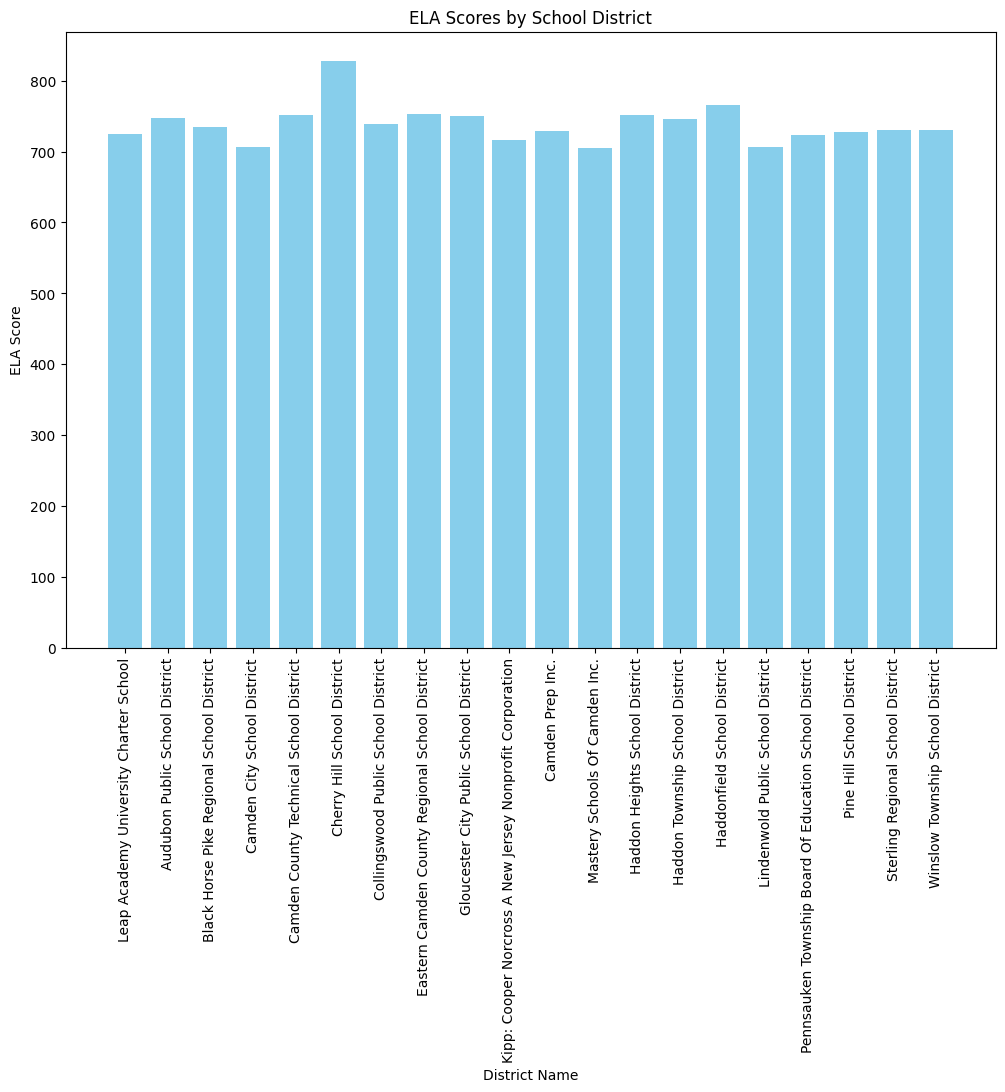

In [ ]:

plt.figure(figsize=(12, 8))
plt.bar(CamdenDistricts_ELA9['District Name'], CamdenDistricts_ELA9['ELA Score'], color='skyblue')
plt.xlabel('District Name')
plt.ylabel('ELA Score')
plt.title('ELA Scores by School District')
plt.xticks(rotation=90)
plt.show()

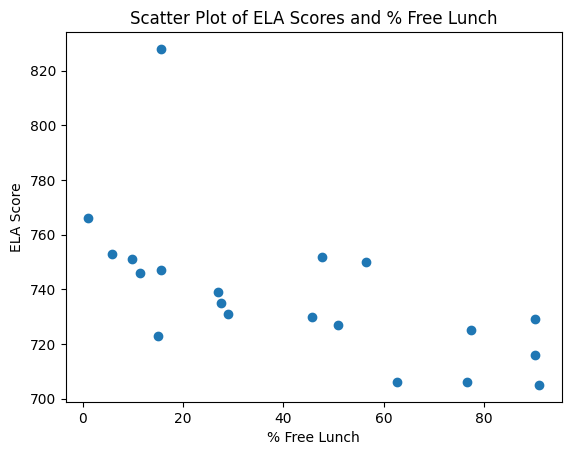

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(CamdenDistricts_ELA9['%Free Lunch'], CamdenDistricts_ELA9['ELA Score'])
plt.xlabel('% Free Lunch')
plt.ylabel('ELA Score')
plt.title('Scatter Plot of ELA Scores and % Free Lunch')
plt.show()


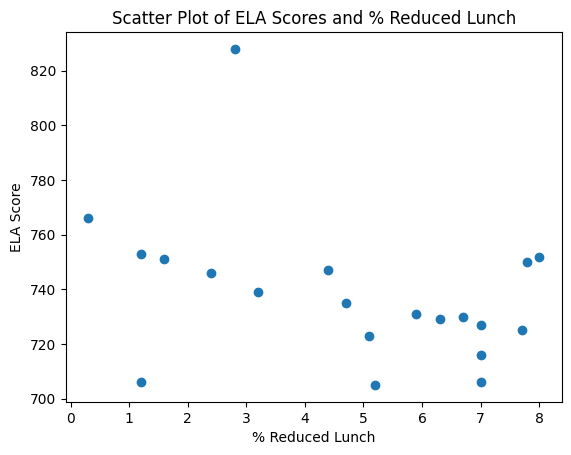

In [ ]:

plt.scatter(CamdenDistricts_ELA9['%Reduced Lunch'], CamdenDistricts_ELA9['ELA Score'])
plt.xlabel('% Reduced Lunch')
plt.ylabel('ELA Score')
plt.title('Scatter Plot of ELA Scores and % Reduced Lunch')
plt.show()


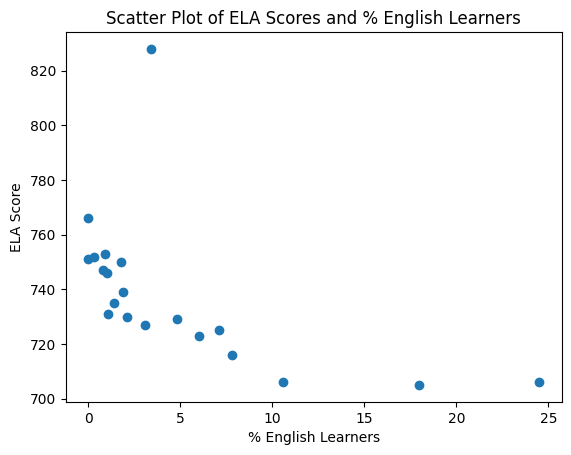

In [ ]:

plt.scatter(CamdenDistricts_ELA9['%English Learners'], CamdenDistricts_ELA9['ELA Score'])
plt.xlabel('% English Learners')
plt.ylabel('ELA Score')
plt.title('Scatter Plot of ELA Scores and % English Learners')
plt.show()


In [ ]:
#ProfileReport(CamdenDistricts_ELA9, title="Camden districts ELA9 data")


after we solidify the groupings that will be used in our analysis, we will agregate bassed on school types within the City of Camden.